# 2단계: 예측 결과 분석 및 시각화

**목적:** 이 노트북은 통합된 `03_prediction_results_all.csv` 파일을 로드하고 모델 성능에 대한 포괄적인 분석을 수행합니다. 이전 `02_result_visualizaion.ipynb` 및 `03_EST_Hardly.ipynb`의 기능을 결합합니다.

**주요 기능:**
- 단일 CSV 파일을 로드합니다.
- 전체 및 데이터셋별 정확도를 계산합니다.
- 오류 분석을 위한 혼동 행렬을 생성합니다.
- `sadness`가 `sad`로 분류된 경우를 올바른 예측으로 간주합니다.
- `matplotlib` 및 `seaborn`을 사용하여 결과를 시각화합니다.
- **새로운 기능:** `anger`, `happy`, `sadness` 라벨에 대해 올바르게 분류된 이미지에 대한 혼동 행렬을 포함합니다.
- **새로운 기능:** 실제 라벨별 총 이미지 수를 시각화합니다.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set plot style
sns.set_theme(style="whitegrid")

# For Korean font support in matplotlib
font_path = "/usr/share/fonts/truetype/nanum/NanumSquareB.ttf"
try:
    font_prop = fm.FontProperties(fname=font_path)
except FileNotFoundError:
    print(f"폰트를 찾을 수 없습니다: {font_path}. 한글이 깨질 수 있습니다.")
    font_prop = None

# Set default font properties for titles and labels if font_prop is available
if font_prop:
    plt.rcParams["font.family"] = font_prop.get_name()
    plt.rcParams["axes.unicode_minus"] = False
else:
    print("Warning: Using default font settings. Korean characters might not display correctly.")

### 통합 예측 데이터 로드

In [ ]:
csv_path = './output/02_prediction_results_all.csv' # Corrected CSV path
try:
    df = pd.read_csv(csv_path)
    print(f"Successfully loaded {csv_path}. Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: {csv_path} not found. Please run the prediction notebook (02_predict_emotions_with_HardlyHumans.ipynb) first.")

Successfully loaded 02_prediction_results_all.csv. Shape: (8396, 4)


,image_path,true_label,predicted_label,dataset
0,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,surprise,train
1,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
2,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
3,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
4,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train


### 정확성 정의
모델의 슬픔에 대한 기본 라벨은 `sad`입니다. 우리 데이터셋의 폴더는 `sadness`입니다. `true_label`이 `sadness`이고 `predicted_label`이 `sad`인 경우 예측을 올바른 것으로 간주합니다.

In [10]:
if 'df' in locals():
    # Define a 'correct' prediction
    # A prediction is correct if labels match OR if true_label is 'sadness' and predicted_label is 'sad'
    df['is_correct'] = (df['true_label'] == df['predicted_label']) | ((df['true_label'] == 'sadness') & (df['predicted_label'] == 'sad'))

### 전체 성능 분석

In [11]:
if 'df' in locals():
    overall_accuracy = df['is_correct'].mean() * 100
    print(f"Overall Model Accuracy: {overall_accuracy:.2f}%")
    
    # Accuracy per dataset
    accuracy_by_dataset = df.groupby('dataset')['is_correct'].mean().reset_index()
    accuracy_by_dataset.columns = ['Dataset', 'Accuracy']
    accuracy_by_dataset['Accuracy'] = accuracy_by_dataset['Accuracy'] * 100
    
    print("Accuracy by Dataset:")
    display(accuracy_by_dataset)

Overall Model Accuracy: 16.19%
Accuracy by Dataset:


,Dataset,Accuracy
0,test,15.916667
1,train,16.127418
2,val,16.750000


### 전체 혼동 행렬
이 행렬은 모든 실제 라벨과 예측 라벨 간의 관계를 보여줍니다.

In [18]:
print(full_confusion_matrix)

predicted_label  anger  contempt  disgust  fear  happy  neutral  sad  surprise
true_label                                                                    
anger                4         3       46     3     84     1354    9       597
happy                0        26        2     0   1310      543    1       213
panic                0         1        2     3     29      817    1      1248
sadness              1         2       30     3     53     1816   45       150


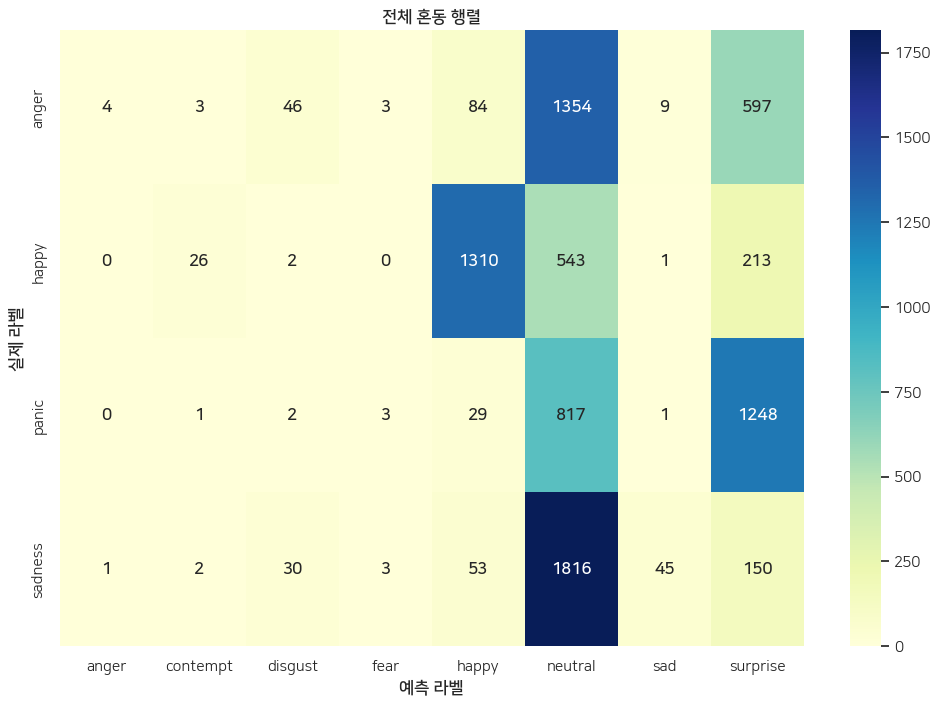

In [ ]:
if 'df' in locals():
    full_confusion_matrix = pd.crosstab(df['true_label'], df['predicted_label'])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(full_confusion_matrix, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"fontproperties": font_prop})
    plt.title('전체 혼동 행렬', fontproperties=font_prop)
    plt.xlabel('예측 라벨', fontproperties=font_prop)
    plt.ylabel('실제 라벨', fontproperties=font_prop)
    plt.show()
    plt.savefig('./output/03_full_confusion_matrix.png')

### 잘못된 예측에 대한 혼동 행렬
이는 모델이 오답을 낼 때 무엇을 예측하는지 파악하는 데 도움이 됩니다.

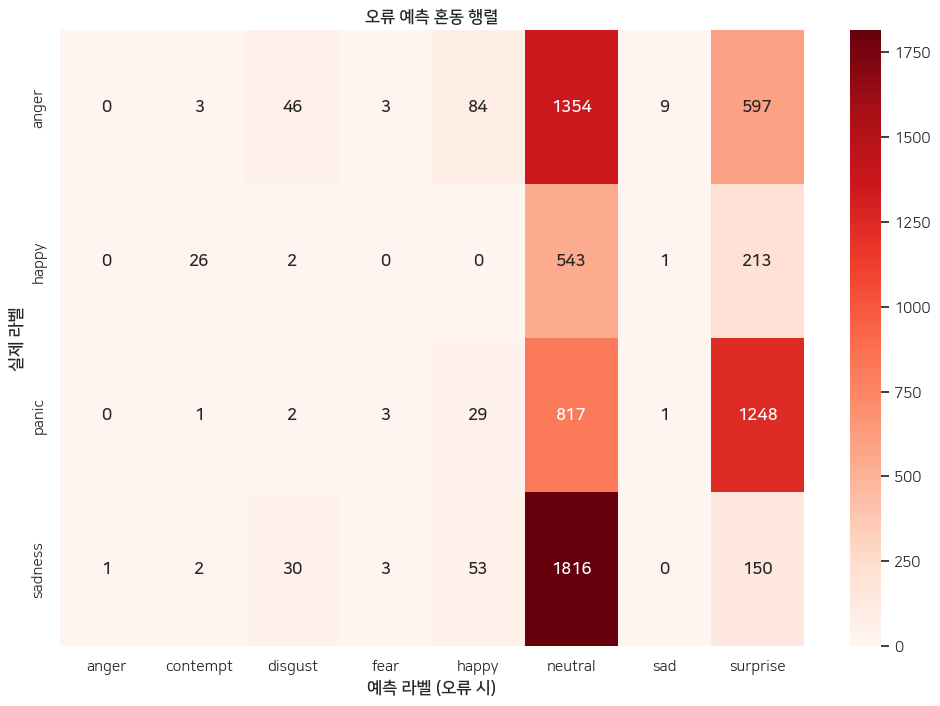

In [13]:
if 'df' in locals():
    wrong_df = df[~df['is_correct']]
    
    # Create a confusion matrix (crosstab) for incorrect predictions
    error_crosstab = pd.crosstab(wrong_df['true_label'], wrong_df['predicted_label'])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(error_crosstab, annot=True, fmt='d', cmap='Reds', annot_kws={"fontproperties": font_prop})
    plt.title('오류 예측 혼동 행렬', fontproperties=font_prop)
    plt.xlabel('예측 라벨 (오류 시)', fontproperties=font_prop)
    plt.ylabel('실제 라벨', fontproperties=font_prop)
    plt.show()

### 실제 라벨별 오류 분석 (백분율)
각 실제 감정에 대해 가장 흔한 잘못된 예측은 무엇이었습니까?

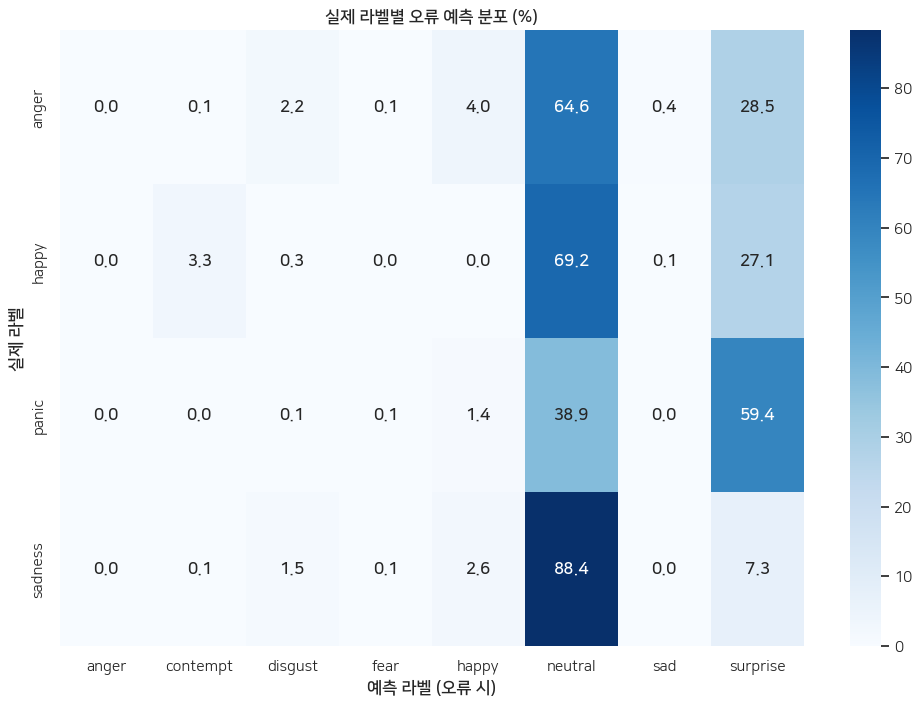

In [14]:
if 'df' in locals() and not error_crosstab.empty:
    # Convert counts to percentages
    error_percent = error_crosstab.div(error_crosstab.sum(axis=1), axis=0) * 100
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(error_percent, annot=True, fmt='.1f', cmap='Blues', annot_kws={"fontproperties": font_prop})
    plt.title('실제 라벨별 오류 예측 분포 (%)', fontproperties=font_prop)
    plt.xlabel('예측 라벨 (오류 시)', fontproperties=font_prop)
    plt.ylabel('실제 라벨', fontproperties=font_prop)
    plt.show()